
# **Running Hive on Pyspark in Colab**

Prepare PySpark Cluster

In [1]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

#Run a local spark session to test your installation:

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()


#Show Existing **Databases**

In [3]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [4]:
# Task: Delete the "bostonh" database
database_name = "bostonh"
drop_database_query = f"DROP DATABASE IF EXISTS {database_name} CASCADE"

# Execute the query using spark.sql
#spark.sql(drop_database_query)


#Create a New Database

In [5]:
spark.sql("CREATE DATABASE BostonH")

DataFrame[]

In [6]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



# Upload Data to Working Directory

In [7]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

# Load Data to Spark Cluster

In [8]:
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [9]:
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

# Save dataset to a new table in Hive

In [10]:
dataset.write.mode("overwrite").saveAsTable("bostonh.bos_housing")

# Show data from Hive Table

In [11]:
table = spark.table("bostonh.bos_housing")
table.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

# Task 1: Data Overview

1. Retrieve and display the first 5 rows of the dataset to get a sense of the data's structure.

2. Find and report the total number of records in the dataset.


In [12]:
# Retrieve and display the first 5 rows of the dataset
task1_query1 = """
SELECT
    *
FROM bostonh.bos_housing
LIMIT 5
"""

dataset_1 = spark.sql(task1_query1)
dataset_1.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [13]:
# Find and report the total number of records in the dataset
task1_query2 = """
SELECT
    COUNT(*) AS total_records
FROM bostonh.bos_housing
"""

total_rcords = spark.sql(task1_query2).collect()[0]["total_records"]
print("Total number of records in the dataset:", total_rcords)

Total number of records in the dataset: 506


# Task 2: Descriptive Statistics

1. Calculate and display basic statistics (mean, standard deviation, min, max) for the "**medv**" (median home value) column.

2. Calculate and display the mean "**rm**" (average number of rooms per dwelling).

In [14]:
# Calculate and display basic statistics for "medv" rounded to 3 decimals
task2_query1 = """
SELECT
    ROUND(AVG(medv), 3) AS mean_medv,
    ROUND(STDDEV(medv), 3) AS std_dev_medv,
    MIN(medv) AS min_medv,
    MAX(medv) AS max_medv
FROM bostonh.bos_housing
"""

medv_stats = spark.sql(task2_query1)
medv_stats.show()

+---------+------------+--------+--------+
|mean_medv|std_dev_medv|min_medv|max_medv|
+---------+------------+--------+--------+
|   22.533|       9.197|     5.0|    50.0|
+---------+------------+--------+--------+



In [15]:
# Calculate and display the mean "rm" rounded to 3 decimals
task2_query2 = """
SELECT
    ROUND(AVG(rm), 3) AS mean_rm
FROM bostonh.bos_housing
"""

rm_mean = spark.sql(task2_query2)
rm_mean.show()

+-------+
|mean_rm|
+-------+
|  6.285|
+-------+



# Task 3: Data Exploration

1. Identify the property with the highest crime rate ("crim"). Provide details about this property.

2. Find and report the property with the lowest median home value ("medv"). Include its details.

In [16]:
# Identify the property with the highest crime rate ("crim")
task3_query1 = """
SELECT
    *
FROM bostonh.bos_housing
WHERE crim = (SELECT
                  MAX(crim)
               FROM bostonh.bos_housing)
"""

highest_crim = spark.sql(task3_query1)
highest_crim.show()

+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



In [17]:
# Find and report the property with the lowest median home value ("medv"). Include its details.
task3_query2 = """
SELECT
    *
FROM bostonh.bos_housing
WHERE medv = (SELECT
                  MIN(medv)
              FROM bostonh.bos_housing)
"""

lowest_medv = spark.sql(task3_query2)
lowest_medv.show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2| 396.9|30.59| 5.0|
|67.9208|0.0| 18.1|   0|0.693|5.683|100.0|1.4254| 24|666|   20.2|384.97|22.98| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+



In SQL (including HiveQL), you should use ***=*** for equality comparisons, not ***==*** as you would in some programming languages like Python.

Using ***==*** for equality comparisons will likely result in a syntax error.

# Task 4: Data Distribution Analysis

1. Create a histogram showing the distribution of the "age" column.

2. Calculate and report the percentage of properties with a "chas" value of 1 (indicating proximity to the Charles River).

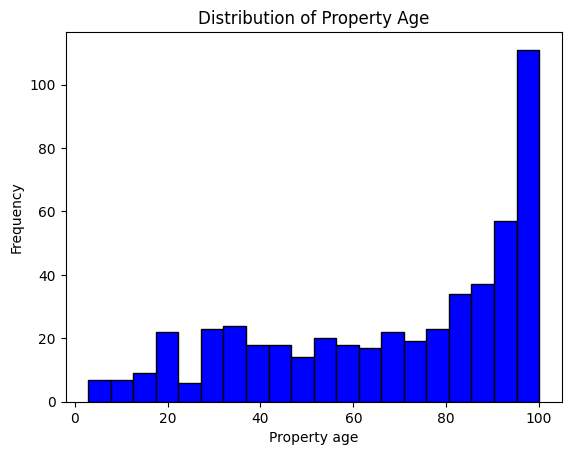

In [19]:
# Create a histogram showing the distribution of the "age" column.
import matplotlib.pyplot as plt

task4_query1 = """
SELECT
    age
FROM bostonh.bos_housing
"""

# Create a DataFrame with the "age" column
age_data = spark.sql(task4_query1).toPandas()

# Plot a histogram
plt.hist(age_data['age'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Property Age')
plt.xlabel('Property age')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Calculate and report the percentage of properties with "chas" value of 1 rounded to 3 decimals.
task4_query2 = """
SELECT
    COUNT(*) AS total
FROM bostonh.bos_housing
"""

task4_query3 = """
SELECT
    COUNT(*) AS chas_1
FROM bostonh.bos_housing
WHERE chas = 1
"""

total_properties_count = spark.sql(task4_query2).collect()[0]['total']
chas_1_count = spark.sql(task4_query3).collect()[0]['chas_1']

# Calculate the percentage and round to 3 decimal places
percentage_chas_1 = round((chas_1_count / total_properties_count) * 100, 3)
print("Percentage of properties with chas=1:", percentage_chas_1)

Percentage of properties with chas=1: 6.917


From the above we could say that in HiveQL it can be given as ***ROUND*** or ***round***, but in spark environment it is ***round***

# Task 5: Correlation Analysis

1. Calculate the correlation coefficient between "rm" and "medv." Explain the relationship between the average number of rooms and median home value.

2. Investigate if there is any correlation between "ptratio" (pupil-teacher ratio) and "nox" (nitrogen oxide concentration). Report your findings.

In [31]:
# Calculate the correlation coefficient between "rm" and "medv" rounded to 3 decimals.
task5_query1 = """
SELECT
    ROUND(CORR(rm, medv), 3) AS correlation_rm_medv
FROM bostonh.bos_housing
"""

correlation_rm_medv = spark.sql(task5_query1)
correlation_rm_medv.show()

+-------------------+
|correlation_rm_medv|
+-------------------+
|              0.695|
+-------------------+



The above code calculates the relationship between two variables in our dataset: “rm” (the average number of rooms per dwelling) and “medv” (the median home value). The correlation coefficient, which measures the strength and direction of the linear relationship between these variables, was found to be approximately **0.695** indicates a **moderately strong positive** linear relationship.

This correlation coefficient reveals that **as the number of rooms per dwelling increases, there is a tendency for the median home value to rise as well.** In other words, **larger houses with more rooms tend to have higher median home values**. However, it’s important to note that while the number of rooms is a meaningful factor, it doesn’t explain all the variation in median home values. Other factors and variables likely contribute to the variation in home values within the dataset.

In [32]:
# Investigate if there is any correlation between "ptratio" and "nox" rounded to 3 decimals.
task5_query2 = """
SELECT
    ROUND(CORR(ptratio, nox), 3) AS correlation_ptratio_nox
FROM bostonh.bos_housing
"""

correlation_ptratio_nox = spark.sql(task5_query2)
correlation_ptratio_nox.show()

+-----------------------+
|correlation_ptratio_nox|
+-----------------------+
|                  0.189|
+-----------------------+



The above code is used to investigate the relationship between two variables in our dataset: “ptratio” (representing the pupil-teacher ratio) and “nox” (indicating nitrogen oxide concentration). The computed result reveals a correlation coefficient of approximately **0.189**.

This correlation coefficient indicates that there is a **very weak positive** linear association between pupil-teacher ratios and nitrogen oxide concentrations. In practical terms, this means that **areas with higher pupil-teacher ratios tend to exhibit slightly higher nitrogen oxide concentrations on average**. However, this relationship is notably feeble, and other variables and factors likely play a more substantial role in explaining the variation in nitrogen oxide concentration within the dataset.

Therefore, while there is a slight tendency for areas with higher pupil-teacher ratios to exhibit slightly elevated nitrogen oxide levels, this relationship is not significant and does not provide a comprehensive explanation for the variations observed.

# Task 6: Advanced Querying

1. Write a HiveQL query to identify and display the top 5 neighborhoods with the highest median home values ("medv").

2. Calculate and report the average property age for neighborhoods with a "chas" value of 1 compared to those with "chas" value of 0.

In [23]:
# Write a HiveQL query to identify and display the top 5 neighborhoods with the highest median home values ("medv").
task6_query1 = """
SELECT
    *
FROM bostonh.bos_housing
ORDER BY medv DESC
LIMIT 5
"""

top5_neighbors = spark.sql(task6_query1)
top5_neighbors.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [24]:
# Average property age for neighborhoods with a "chas" value of 1.
task6_query2 = """
SELECT
    ROUND(AVG(age), 3) AS avg_age_chas1
FROM bostonh.bos_housing
WHERE chas = 1
"""

avg_age_neighbors_chas_1 = spark.sql(task6_query2)
avg_age_neighbors_chas_1.show()

# Average property age for neighborhoods with a "chas" value of 0
task6_query2 = """
SELECT
    ROUND(AVG(age), 3) AS avg_age_chas0
FROM bostonh.bos_housing
WHERE chas = 0
"""

avg_age_neighbors_chas_0 = spark.sql(task6_query2)
avg_age_neighbors_chas_0.show()

+-------------+
|avg_age_chas1|
+-------------+
|         77.5|
+-------------+

+-------------+
|avg_age_chas0|
+-------------+
|       67.912|
+-------------+



The Boston Housing dataset contains information about the age of properties in different neighborhoods based on their proximity to the Charles River. The above results shows that there is a clear difference in the age of properties between neighborhoods with “chas” values of 1 and those with “chas” values of 0.

For neighborhoods with a **“chas”** value of **1**, the average property age is around **77.5 years**. This means that properties in these areas tend to be relatively older. It’s possible that these neighborhoods have historical significance, with housing stock dating back several decades. The higher average age reflects a level of historical character and charm in these communities.

In contrast, neighborhoods with a **“chas”** value of **0** exhibit an average property age of approximately **67.912 years**. This figure is noticeably lower than that of their “chas” value 1 counterparts. It implies that properties in these neighborhoods are relatively newer, indicating that development and construction in these areas might be more recent. The lower average age could signify a different character, possibly with a more modern and contemporary housing landscape.

The difference in property age between the two groups highlights the impact of proximity to the Charles River on the age distribution of properties. Understanding such distinctions can be valuable for potential homebuyers or real estate investors seeking to make informed decisions about the neighborhoods they wish to explore and invest in.

# Task 7: Visualization

1. Create a Hive view named "property_age_view" that includes the "age" and "medv" columns.

2. Plot a scatter plot of property age against median home value using a data visualization tool of your choice.

In [25]:
# Create a Hive view named "property_age_view" that includes "age" and "medv" columns
task7_query1 = """
CREATE OR REPLACE TEMPORARY VIEW property_age_view AS
SELECT
    age, medv
FROM bostonh.bos_housing
"""

spark.sql(task7_query1)

task7_query2 = """
SELECT
    *
FROM property_age_view
"""

# Select and display data from the "property_age_view"
result = spark.sql(task7_query2)
result.show()

+-----+----+
|  age|medv|
+-----+----+
| 65.2|24.0|
| 78.9|21.6|
| 61.1|34.7|
| 45.8|33.4|
| 54.2|36.2|
| 58.7|28.7|
| 66.6|22.9|
| 96.1|27.1|
|100.0|16.5|
| 85.9|18.9|
| 94.3|15.0|
| 82.9|18.9|
| 39.0|21.7|
| 61.8|20.4|
| 84.5|18.2|
| 56.5|19.9|
| 29.3|23.1|
| 81.7|17.5|
| 36.6|20.2|
| 69.5|18.2|
+-----+----+
only showing top 20 rows



A Hive view is a virtual and logical representation of data stored in Hive, a SQL-like query language and data warehousing system designed for Hadoop.

Unlike physical tables, **views do not store data but provide a simplified, controlled means to access specific subsets of data from one or more underlying tables.**

Hive views created using **CREATE OR REPLACE TEMPORARY VIEW** are temporary and should be **accessible from other cells as long as the SparkSession is active** and the view is not dropped. These views are scoped to the SparkSession, meaning they exist as long as your notebook session is active. You can create views in one cell and reference them in other cells within the same notebook session.

They offer various advantages, such as data abstraction, security and access control, reusability, and performance optimization. Views can be tailored to present a selected set of columns or rows, simplifying complex data structures and making it easier for users to interact with the data. They also offer a level of abstraction that protects users from underlying table changes, ensuring a consistent interface. Created using standard SQL commands, Hive views are used in queries, reports, and analyses, enabling users to work with data more effectively and efficiently.

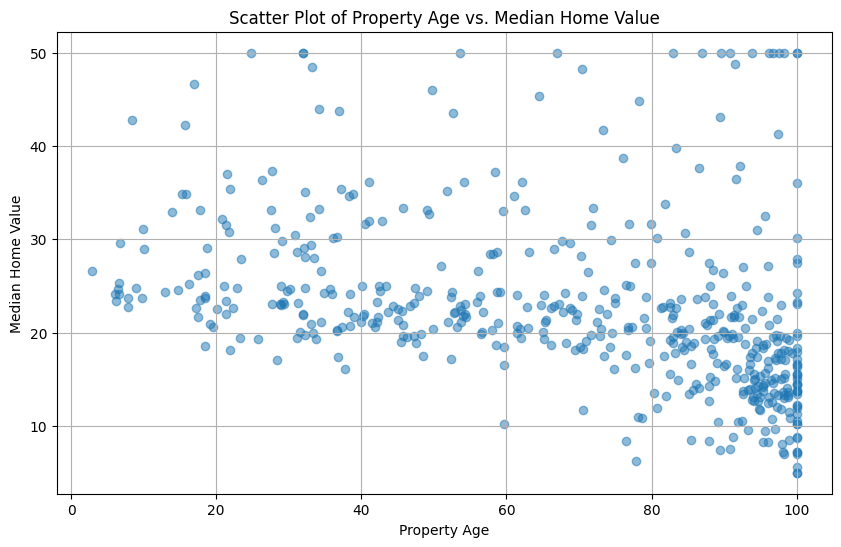

In [26]:
# Plot a scatter plot of property age against median home value using a data visualization tool of your choice.
import matplotlib.pyplot as plt

# Query to retrieve data for the scatter plot
task7_query3 = """
SELECT
    age, medv
FROM property_age_view
"""
result = spark.sql(task7_query3).toPandas()

# Extract the data for plotting
age = result['age']
medv = result['medv']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(age, medv, alpha=0.5)
plt.title("Scatter Plot of Property Age vs. Median Home Value")
plt.xlabel("Property Age")
plt.ylabel("Median Home Value")
plt.grid(True)

# Show the plot
plt.show()


From the above plot, it's evident that **older homes in the Boston area are associated with lower median home values**. This observation can be attributed to various factors, including the necessity for renovations and modernization, the utilization of outdated construction techniques, and less favorable locations.

Additionally, within the dataset, there is a **greater concentration of older homes in comparison to newer ones**. In other words, **older homes exhibit a broader range of home values when compared to their newer counterparts**.

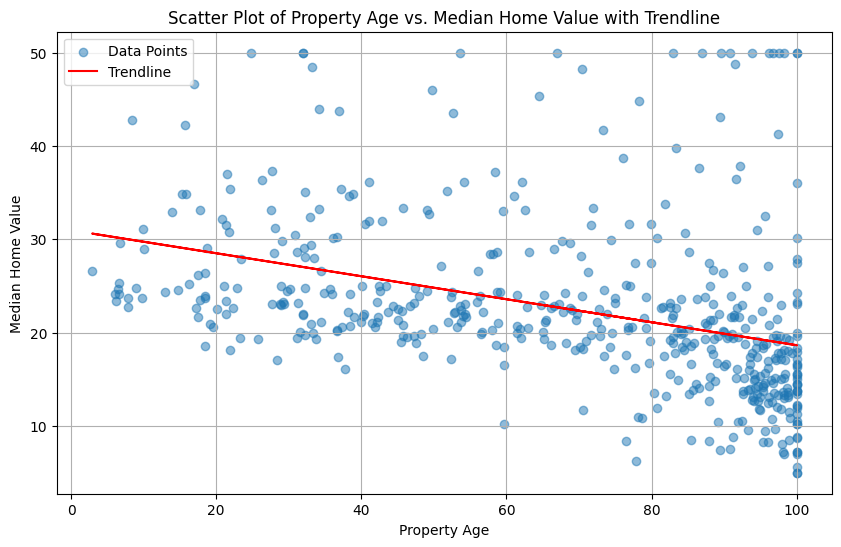

In [30]:
# Plot a scatter plot of property age against median home value using a data visualization tool of your choice.
import matplotlib.pyplot as plt
import numpy as np

# Query to retrieve data for the scatter plot
task7_query3 = """
SELECT
    age, medv
FROM property_age_view
"""
result = spark.sql(task7_query3).toPandas()

# Extract the data for plotting
age = result['age']
medv = result['medv']

# Perform linear regression
slope, intercept = np.polyfit(age, medv, 1)
trendline = intercept + slope * age

# Create a scatter plot with the trendline
plt.figure(figsize=(10, 6))
plt.scatter(age, medv, alpha=0.5, label='Data Points')
plt.plot(age, trendline, color='red', label='Trendline')
plt.title("Scatter Plot of Property Age vs. Median Home Value with Trendline")
plt.xlabel("Property Age")
plt.ylabel("Median Home Value")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Task 8: Outliers Detection

1. Write a query to identify and report properties with a "crim" value greater than 10 (considered as potential outliers).

2. Discuss the significance of detecting outliers in data analysis.

In [31]:
# Identify and report properties with a "crim" value greater than 10 (considered as potential outliers).

# SQL Query to identify and report properties with "crim" value greater than 10 (outliers)
task8_query1 = """
SELECT
    *
FROM bostonh.bos_housing
WHERE crim > 10
"""

# Execute the query
outliers = spark.sql(task8_query1)

# Show the query result
outliers.show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|6.545| 99.1|1.5192| 24|666|   20.2| 396.9|21.0

In [27]:
# HiveQL Query to identify and report properties with "crim" value greater than 10 (outliers)
task8_query2_outliers_query = """
SELECT
    *
FROM bostonh.bos_housing
WHERE crim > 10
"""

# HiveQL Query to count the total number of outliers
task8_query3_count_query = """
SELECT
    COUNT(*) AS total_outliers
FROM bostonh.bos_housing
WHERE crim > 10
"""

# Execute the outliers query to get the list of outlier properties
outliers = spark.sql(task8_query2_outliers_query)

# Execute the count query to get the total number of outliers
outliers_count = spark.sql(task8_query3_count_query).collect()[0]['total_outliers']

# Show the list of outlier properties
outliers.show()

# Show the total count of outliers
print("Total number of potential outliers considered:", outliers_count)

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|6.545| 99.1|1.5192| 24|666|   20.2| 396.9|21.0

Detecting outliers is a critical step in the analysis of any dataset, such as the Boston Housing dataset, and it serves multiple essential purposes.

Outliers often stem from **data errors or inconsistencies**, which can undermine the overall quality and reliability of the dataset. For example, the presence of an extremely high or low home value might indicate a data entry error that needs correction.

When conducting **statistical analyses**, the presence of outliers has the **potential to significantly influence the results, potentially leading to skewed or inaccurate findings**. Consider a situation where a few exceptionally high-priced properties are included in the dataset; these outliers could distort the calculation of the mean home value and lead to an inaccurate representation of the market.

**Machine learning models**, particularly those used in **regression or clustering, can be highly sensitive to outliers, potentially compromising the model's accuracy and effectiveness**. For instance, if an outlier represents a property with highly unusual characteristics, it may heavily impact the prediction made by a regression model.

Moreover, the identification of outliers can shed light on unique and exceptional property listings that warrant special attention. In the Boston Housing dataset, detecting an outlier with an extremely high home value might lead to the discovery of a luxury property with unique features, which could be of interest to certain buyers.

Additionally, reliable data is indispensable for informing housing policies, making well-informed decisions, and guiding urban development. Urban planners and policymakers rely on accurate data to make informed choices about housing development, affordability, and urban planning.

Lastly, for real estate investors and property buyers, outliers can serve as indicators of extraordinary investment opportunities or potential concerns, adding an extra layer of significance to the process of outlier detection. For instance, identifying an outlier that represents an undervalued property might present a lucrative investment opportunity for a savvy investor.

# Task 9: Hypothesis Testing (20 minutes)

1. Formulate a hypothesis about the impact of the "rm" (average number of rooms) on median home value.

2. Conduct a hypothesis test using HiveQL to determine if there is a statistically significant relationship between these variables.

**Formulating the Hypotheses**

**Null Hypothesis (H0)**: The average number of rooms ("rm") has no statistically significant impact on median home value ("medv").

**Alternative Hypothesis (H1)**: The average number of rooms ("rm") has a statistically significant impact on median home value ("medv").


In [33]:
# Hypothesis Testing in Python code
# Null Hypothesis: There is no significant relationship between "rm" and "medv".
# Alternative Hypothesis: There is a significant relationship between "rm" and "medv".

import pandas as pd

boston_housing_pd = dataset.toPandas()

from scipy import stats

# Perform the T-test for "rm" and "medv"
t_stat, p_value = stats.ttest_ind(boston_housing_pd['rm'], boston_housing_pd['medv'])

# Print the T-statistic and p-value
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -39.62461149680032
P-value: 6.49016750007408e-208


In [30]:
# Create a Hive view named "rm_medv" that includes "rm" and "medv" columns

from scipy import stats

task9_query1 = """
CREATE OR REPLACE TEMPORARY VIEW rm_medv AS
SELECT
    rm, medv
FROM bostonh.bos_housing
"""

spark.sql(task9_query1)

task9_query2 = """
SELECT
    *
FROM rm_medv
"""

# Retrieve the data from the Hive view
rm_medv_data = spark.sql(task9_query2).toPandas()

# Perform the T-test for "rm" and "medv"
t_stat, p_value = stats.ttest_ind(rm_medv_data['rm'], rm_medv_data['medv'])

# Print the T-statistic and p-value
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -39.62461149680032
P-value: 6.49016750007408e-208


In hypothesis testing:

**T-Statistic**: Measures sample mean difference from the population mean of "rm" and "medv." A highly negative t-statistic indicates substantial "rm" differences in properties with higher "medv."

**P-Value:** Reflects extreme t-statistic likelihood under the null hypothesis (H0). A tiny p-value, near 0, strongly rejects H0. Very low p-values (<0.05) provide robust evidence to reject the null hypothesis.

In our results, the tiny p-value (6.49e-208) significantly < 0.05 suggests rejecting H0. This suggests that we should reject the null hypothesis (H0) in favor of the alternative hypothesis (H1). In other words, there is strong evidence to suggest that the average number of rooms ("rm") has a statistically significant impact on median home value ("medv").

In [36]:
# Import the required function
from pyspark.sql.functions import col, udf, format_number
from pyspark.sql.types import DoubleType
from scipy.stats import norm

# Create a Hive view named "rm_medv" that includes "rm" and "medv" columns
task9_query1 = """
CREATE OR REPLACE TEMPORARY VIEW rm_medv AS
SELECT
    rm, medv
FROM bostonh.bos_housing
"""

spark.sql(task9_query1)

# Define CTEs for calculating means, standard deviations, and sample size
task9_query2 = """
-- Calculate the t-statistic, degrees of freedom, and p-value in a single query
WITH summary_stats AS (
    SELECT
        AVG(rm) AS mean_rm,
        AVG(medv) AS mean_medv,
        STDDEV(rm) AS stddev_rm,
        STDDEV(medv) AS stddev_medv,
        COUNT(rm) AS sample_size
    FROM rm_medv
)

-- Calculate the t-statistic and degrees of freedom
SELECT
    (mean_rm - mean_medv) / (
        SQRT((stddev_rm * stddev_rm / sample_size) + (stddev_medv * stddev_medv / sample_size))
    ) AS t_statistic,
    sample_size - 1 AS degrees_of_freedom
FROM summary_stats
"""

# Execute the query and show the result
result = spark.sql(task9_query2)

# Calculate p-value using a UDF
def calculate_p_value(t_statistic, degrees_of_freedom):
    p_value = 2 * (1 - norm.cdf(abs(t_statistic), loc=0, scale=1))
    return float(p_value)

# Register the UDF with a specified return type
calculate_p_value_udf = udf(calculate_p_value, DoubleType())

# Calculate p-value and add it to the result
result = result.withColumn("p_value", calculate_p_value_udf(col("t_statistic"), col("degrees_of_freedom")))

# Format the p-value with more decimal places
result = result.withColumn("p_value", format_number(col("p_value"), 210))  # Adjust the number of decimal places as needed

# Show the result
result.show()

+------------------+------------------+--------------------+
|       t_statistic|degrees_of_freedom|             p_value|
+------------------+------------------+--------------------+
|-39.62461149680037|               505|0.000000000000000...|
+------------------+------------------+--------------------+



In [35]:
# Create a Hive view named "rm_medv" that includes "rm" and "medv" columns
task9_query1 = """
CREATE OR REPLACE TEMPORARY VIEW rm_medv AS
SELECT
    rm, medv
FROM bostonh.bos_housing
"""

spark.sql(task9_query1)

# Define CTEs for calculating means, standard deviations, and sample size
task9_query2 = """
-- Calculate the t-statistic, degrees of freedom, and p-value in a single query
WITH summary_stats AS (
    SELECT
        AVG(rm) AS mean_rm,
        AVG(medv) AS mean_medv,
        STDDEV(rm) AS stddev_rm,
        STDDEV(medv) AS stddev_medv,
        COUNT(rm) AS sample_size
    FROM rm_medv
)

-- Calculate the t-statistic, degrees of freedom, and p-value
SELECT
    (mean_rm - mean_medv) / (
        SQRT((stddev_rm * stddev_rm / sample_size) + (stddev_medv * stddev_medv / sample_size))
    ) AS t_statistic,
    sample_size - 1 AS degrees_of_freedom
FROM summary_stats
"""

# Execute the query and show the result
spark.sql(task9_query2).show()

+------------------+------------------+
|       t_statistic|degrees_of_freedom|
+------------------+------------------+
|-39.62461149680037|               505|
+------------------+------------------+



In [37]:
# Create a Hive view named "rm_medv" that includes "rm" and "medv" columns
task9_query1 = """
CREATE OR REPLACE TEMPORARY VIEW rm_medv AS
SELECT
    rm, medv
FROM bostonh.bos_housing
"""

spark.sql(task9_query1)

# Define CTEs for calculating means, standard deviations, and sample size
task9_query2 = """
WITH means AS (
    SELECT
        AVG(rm) AS mean_rm,
        AVG(medv) AS mean_medv
    FROM rm_medv
),
stddevs AS (
    SELECT
        STDDEV(rm) AS stddev_rm,
        STDDEV(medv) AS stddev_medv
    FROM rm_medv
),
sample_sizes AS (
    SELECT
        COUNT(rm) AS sample_size
    FROM rm_medv
)

-- Calculate the t-statistic (assuming equal variances)
SELECT
    (means.mean_rm - means.mean_medv) / (
        SQRT((stddevs.stddev_rm * stddevs.stddev_rm / sample_sizes.sample_size) + (stddevs.stddev_medv * stddevs.stddev_medv / sample_sizes.sample_size))
    ) AS t_statistic
FROM means, stddevs, sample_sizes;

"""

# Execute the query and show the result
spark.sql(task9_query2).show()


+------------------+
|       t_statistic|
+------------------+
|-39.62461149680037|
+------------------+



In [38]:
# Create a Hive view named "rm_medv" that includes "rm" and "medv" columns
task9_query1 = """
CREATE OR REPLACE TEMPORARY VIEW rm_medv AS
SELECT
    rm, medv
FROM bostonh.bos_housing
"""

spark.sql(task9_query1)

# Define CTEs for calculating means, standard deviations, and sample size
task9_query2 = """
-- Calculate the means of "rm" and "medv"
WITH means AS (
    SELECT
        AVG(rm) AS mean_rm,
        AVG(medv) AS mean_medv
    FROM rm_medv
),
-- Calculate the standard deviations of "rm" and "medv"
stddevs AS (
    SELECT
        STDDEV(rm) AS stddev_rm,
        STDDEV(medv) AS stddev_medv
    FROM rm_medv
),
-- Calculate the sample size (assuming equal sample sizes for "rm" and "medv")
sample_sizes AS (
    SELECT
        COUNT(rm) AS sample_size
    FROM rm_medv
),
-- Calculate the t-statistic (assuming equal variances)
t_stat AS (
    SELECT
        (mean_rm - mean_medv) / (
            SQRT((stddev_rm * stddev_rm / sample_size) + (stddev_medv * stddev_medv / sample_size))
        ) AS t_statistic
    FROM means, stddevs, sample_sizes
)
-- Calculate the degrees of freedom (assumes equal sample sizes)
SELECT
    sample_size - 1 AS degrees_of_freedom
FROM sample_sizes

"""

# Execute the query and show the result
spark.sql(task9_query2).show()

+------------------+
|degrees_of_freedom|
+------------------+
|               505|
+------------------+



In [39]:
# Import required libraries
from pyspark.sql.functions import col
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
from scipy.stats import norm

# Create a Hive view named "rm_medv" that includes "rm" and "medv" columns
task9_query1 = """
CREATE OR REPLACE TEMPORARY VIEW rm_medv AS
SELECT
    rm, medv
FROM bostonh.bos_housing
"""

spark.sql(task9_query1)

# Define CTEs for calculating means, standard deviations, and sample size
task9_query2 = """
-- Calculate the t-statistic, degrees of freedom, and p-value in a single query
WITH summary_stats AS (
    SELECT
        AVG(rm) AS mean_rm,
        AVG(medv) AS mean_medv,
        STDDEV(rm) AS stddev_rm,
        STDDEV(medv) AS stddev_medv,
        COUNT(rm) AS sample_size
    FROM rm_medv
)

-- Calculate the t-statistic and degrees of freedom
SELECT
    (mean_rm - mean_medv) / (
        SQRT((stddev_rm * stddev_rm / sample_size) + (stddev_medv * stddev_medv / sample_size))
    ) AS t_statistic,
    sample_size - 1 AS degrees_of_freedom
FROM summary_stats
"""

# Execute the query and show the result
result = spark.sql(task9_query2)

# Calculate p-value using a UDF
def calculate_p_value(t_statistic, degrees_of_freedom):
    p_value = 2 * (1 - norm.cdf(abs(t_statistic), loc=0, scale=1))
    return float(p_value)

# Register the UDF with a specified return type
calculate_p_value_udf = udf(calculate_p_value, DoubleType())

# Calculate p-value and add it to the result
result = result.withColumn("p_value", calculate_p_value_udf(col("t_statistic"), col("degrees_of_freedom")))

# Show the result
result.show()


+------------------+------------------+-------+
|       t_statistic|degrees_of_freedom|p_value|
+------------------+------------------+-------+
|-39.62461149680037|               505|    0.0|
+------------------+------------------+-------+

